In [1]:

import sys
sys.path.insert(0, '../scripts/')
from load_modify_sample_utils import load_model, get_objective_functions, get_reaction_bounds, modify_model, sample_gapsplit, plot_grid_95_reactions
from load_modify_sample_utils import sample_dingo, sample_optgp, sampling_statistics
from correlations_utils import correlated_reactions, split_forward_reverse
from graphs_utils import construct_graph, plot_graph


/home/touliopoulos/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/touliopoulos/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
ec_cobra_model, ec_cobra_reactions, ec_dingo_model, ec_dingo_reactions = load_model("../ext_data/models/e_coli_core.xml")

objective_functions = get_objective_functions(ec_cobra_model)
print(objective_functions)

default_reaction_bounds = get_reaction_bounds(ec_cobra_model)
print(default_reaction_bounds)

Set parameter Username
Set parameter LicenseID to value 2642044
Academic license - for non-commercial use only - expires 2026-03-25
['BIOMASS_Ecoli_core_w_GAM']
{'PFK': (0.0, 1000.0), 'PFL': (0.0, 1000.0), 'PGI': (-1000.0, 1000.0), 'PGK': (-1000.0, 1000.0), 'PGL': (0.0, 1000.0), 'ACALD': (-1000.0, 1000.0), 'AKGt2r': (-1000.0, 1000.0), 'PGM': (-1000.0, 1000.0), 'PIt2r': (-1000.0, 1000.0), 'ALCD2x': (-1000.0, 1000.0), 'ACALDt': (-1000.0, 1000.0), 'ACKr': (-1000.0, 1000.0), 'PPC': (0.0, 1000.0), 'ACONTa': (-1000.0, 1000.0), 'ACONTb': (-1000.0, 1000.0), 'ATPM': (8.39, 1000.0), 'PPCK': (0.0, 1000.0), 'ACt2r': (-1000.0, 1000.0), 'PPS': (0.0, 1000.0), 'ADK1': (-1000.0, 1000.0), 'AKGDH': (0.0, 1000.0), 'ATPS4r': (-1000.0, 1000.0), 'PTAr': (-1000.0, 1000.0), 'PYK': (0.0, 1000.0), 'BIOMASS_Ecoli_core_w_GAM': (0.0, 1000.0), 'PYRt2': (-1000.0, 1000.0), 'CO2t': (-1000.0, 1000.0), 'RPE': (-1000.0, 1000.0), 'CS': (0.0, 1000.0), 'RPI': (-1000.0, 1000.0), 'SUCCt2_2': (0.0, 1000.0), 'CYTBD': (0.0, 1000.

In [3]:
ec_cobra_model_condition_1, ec_dingo_model_condition_1 = modify_model(ec_cobra_model, objective_function="BIOMASS_Ecoli_core_w_GAM", optimal_percentage=50)
ec_cobra_model_condition_2, ec_dingo_model_condition_2 = modify_model(ec_cobra_model, objective_function="BIOMASS_Ecoli_core_w_GAM", optimal_percentage=50)


samples_optgp_condition_1 = sample_optgp(ec_cobra_model_condition_1, n_samples = 3000, thinning=1, reaction_in_rows = True)
samples_optgp_condition_2 = sample_optgp(ec_cobra_model_condition_2, n_samples = 3000, thinning=100, reaction_in_rows = True)



Read LP format model from file /tmp/tmp2zkx5fl2.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros


Read LP format model from file /tmp/tmp8p2gako0.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmp3uyrt_e3.lp
Reading time = 0.02 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmp1xfls8f1.lp
Reading time = 0.01 seconds
: 72 rows, 190 columns, 720 nonzeros


In [ ]:

linear_correlation_matrix_1, non_linear_correlation_matrix_1, mixed_correlation_matrix_1, correlations_dictionary_1 = correlated_reactions(
                                                               steady_states = samples_optgp_condition_1,
                                                               split_bidirectional_reactions = False,
                                                               boolean_sharing_metabolites_matrix=None,
                                                               reactions=ec_dingo_reactions, 
                                                               pearson_cutoff = 0.3, 
                                                               indicator_cutoff = 1,
                                                               jensenshannon_cutoff = 0.1,
                                                               std_cutoff= 1e-6,
                                                               include_non_linear = True, 
                                                               cells = 10, 
                                                               cop_coeff = 0.3, 
                                                               lower_triangle = False, 
                                                               verbose = True)

/home/touliopoulos/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/touliopoulos/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Completed the process of 1 from 3700 copulas
Completed the process of 2 from 3700 copulas
Completed the process of 3 from 3700 copulas
Completed the process of 4 from 3700 copulas
Completed the process of 5 from 3700 copulas
Completed the process of 6 from 3700 copulas
Completed the process of 7 from 3700 copulas
Completed the process of 8 from 3700 copulas
Completed the process of 9 from 3700 copulas
Completed the process of 10 from 3700 copulas
Completed the process of 11 from 3700 copulas
Completed the process of 12 from 3700 copulas
Completed the process of 13 from 3700 copulas
Completed the process of 14 from 3700 copulas
Completed the process of 15 from 3700 copulas
Completed the process of 16 from 3700 copulas
Completed the process of 17 from 3700 copulas
Completed the process of 18 from 3700 copulas
Completed the process of 19 from 3700 copulas
Completed the process of 20 from 3700 copulas
Completed the process of 21 from 3700 copulas
Completed the process of 22 from 3700 copul

In [ ]:

linear_correlation_matrix_2, non_linear_correlation_matrix_2, mixed_correlation_matrix_2, correlations_dictionary_2 = correlated_reactions(
                                                               steady_states = samples_optgp_condition_2,
                                                               split_bidirectional_reactions = False,
                                                               boolean_sharing_metabolites_matrix=None,
                                                               reactions=ec_dingo_reactions, 
                                                               pearson_cutoff = 0.3, 
                                                               indicator_cutoff = 1,
                                                               jensenshannon_cutoff = 0.1,
                                                               std_cutoff= 1e-6,
                                                               include_non_linear = True, 
                                                               cells = 10, 
                                                               cop_coeff = 0.3, 
                                                               lower_triangle = False, 
                                                               verbose = True)


Completed the process of 1 from 3974 copulas
Completed the process of 2 from 3974 copulas
Completed the process of 3 from 3974 copulas
Completed the process of 4 from 3974 copulas
Completed the process of 5 from 3974 copulas
Completed the process of 6 from 3974 copulas
Completed the process of 7 from 3974 copulas
Completed the process of 8 from 3974 copulas
Completed the process of 9 from 3974 copulas
Completed the process of 10 from 3974 copulas
Completed the process of 11 from 3974 copulas
Completed the process of 12 from 3974 copulas
Completed the process of 13 from 3974 copulas
Completed the process of 14 from 3974 copulas
Completed the process of 15 from 3974 copulas
Completed the process of 16 from 3974 copulas
Completed the process of 17 from 3974 copulas
Completed the process of 18 from 3974 copulas
Completed the process of 19 from 3974 copulas
Completed the process of 20 from 3974 copulas
Completed the process of 21 from 3974 copulas
Completed the process of 22 from 3974 copul

In [ ]:

G, pos = construct_graph(linear_correlation_matrix_2, 
                         non_linear_correlation_matrix_2, 
                         reactions=ec_dingo_reactions,
                         remove_unconnected_nodes=True,
                         correction=False)

plot_graph(G, pos)



G, pos = construct_graph(linear_correlation_matrix_2, 
                         non_linear_correlation_matrix_2, 
                         reactions=ec_dingo_reactions,
                         remove_unconnected_nodes=True,
                         correction=True)

plot_graph(G, pos)


In [6]:
import numpy as np
import networkx as nx

# Degree centrality - requires full nodes
#degrees1 = np.array([G_condition_1.degree(n) for n in G_condition_1.nodes()])
#degrees2 = np.array([G_condition_2.degree(n) for n in G_condition_2.nodes()])
#for index, value in enumerate(degrees1 - degrees2):
#    if abs(value) >= 0:
#        print(list(G_condition_1.nodes())[index], list(G_condition_1.nodes())[index], value)
#        #pass


# same as above but with weights and absolute edges
degrees1 = np.array([G_condition_1.degree(n, weight='weight') for n in G_condition_1.nodes()])
degrees2 = np.array([G_condition_2.degree(n, weight='weight') for n in G_condition_2.nodes()])
for index, value in enumerate(degrees1 - degrees2):
    if abs(value) >= 1:
        #print(list(G_condition_1.nodes())[index], value)
        pass


print("\n")


#closeness_G1 = nx.closeness_centrality(G_condition_1, distance="1/weight")
#closeness_G2 = nx.closeness_centrality(G_condition_2, distance="1/weight")
#closeness_diff = {node: closeness_G2.get(node, 0) - closeness_G1.get(node, 0) for node in set(G_condition_1.nodes()).union(G_condition_2.nodes())}
#sorted_nodes = sorted(closeness_diff.items(), key=lambda x: x[1], reverse=True)

#for node, change in sorted_nodes:
#        print(f"Node {node}: ΔCloseness = {change:.4f}")


print("\n")


centrality_G1 = nx.betweenness_centrality(G_condition_1, weight='weight', normalized=True)
centrality_G2 = nx.betweenness_centrality(G_condition_2, weight='weight', normalized=True)
centrality_diff = {node: centrality_G2.get(node, 0) - centrality_G1.get(node, 0) for node in set(G_condition_1.nodes()).union(G_condition_2.nodes())}
sorted_nodes = sorted(centrality_diff.items(), key=lambda x: x[1], reverse=True)

for node, change in sorted_nodes:
        print(f"Node {node}: ΔCentrality = {change:.4f}")







Node FRD7: ΔCentrality = 0.5620
Node SUCDi: ΔCentrality = 0.4802
Node TKT2: ΔCentrality = 0.4145
Node ACALDt: ΔCentrality = 0.1581
Node EX_acald_e: ΔCentrality = 0.1395
Node EX_for_e: ΔCentrality = 0.1283
Node BIOMASS_Ecoli_core_w_GAM: ΔCentrality = 0.1067
Node MDH: ΔCentrality = 0.1031
Node PGM: ΔCentrality = 0.0936
Node GLUN: ΔCentrality = 0.0810
Node PDH: ΔCentrality = 0.0186
Node MALS: ΔCentrality = 0.0148
Node PYK: ΔCentrality = 0.0134
Node FBA: ΔCentrality = 0.0112
Node TPI: ΔCentrality = 0.0112
Node ICDHyr: ΔCentrality = 0.0090
Node GLUt2r: ΔCentrality = 0.0083
Node EX_glu__L_e: ΔCentrality = 0.0070
Node EX_akg_e: ΔCentrality = 0.0044
Node ICL: ΔCentrality = 0.0030
Node ACONTa: ΔCentrality = 0.0019
Node CS: ΔCentrality = 0.0019
Node ACONTb: ΔCentrality = 0.0019
Node EX_pi_e: ΔCentrality = 0.0000
Node PIt2r: ΔCentrality = 0.0000
Node ENO: ΔCentrality = 0.0000
Node RPI: ΔCentrality = 0.0000
Node TKT1: ΔCentrality = 0.0000
Node FORt2: ΔCentrality = 0.0000
Node GND: ΔCentrality 

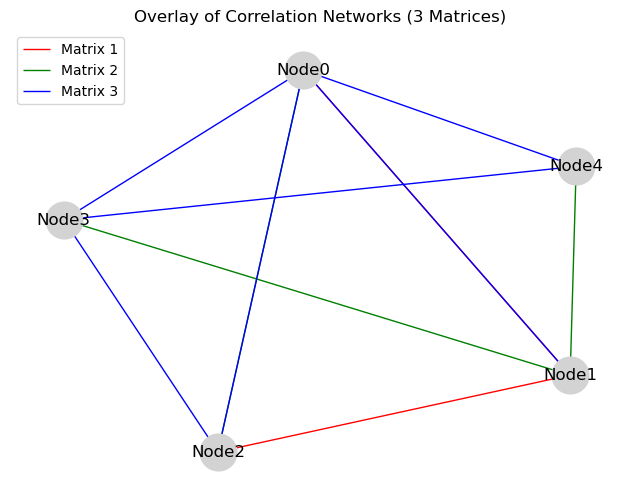

In [1]:

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Example: 5 nodes and 3 correlation matrices
n = 5
nodes = [f'Node{i}' for i in range(n)]

# Random correlation matrices (symmetric with zeros on diagonal)
np.random.seed(42)
corr1 = np.random.rand(n, n)
corr2 = np.random.rand(n, n)
corr3 = np.random.rand(n, n)

for mat in [corr1, corr2, corr3]:
    np.fill_diagonal(mat, 0)
    mat[:] = (mat + mat.T) / 2  # Make symmetric

# Threshold to draw an edge
threshold = 0.5

# Build a base graph (just for node layout)
G_base = nx.Graph()
G_base.add_nodes_from(nodes)
pos = nx.spring_layout(G_base, seed=42)

# Create three separate edge sets
edges1 = [(nodes[i], nodes[j]) for i in range(n) for j in range(i) if corr1[i, j] > threshold]
edges2 = [(nodes[i], nodes[j]) for i in range(n) for j in range(i) if corr2[i, j] > threshold]
edges3 = [(nodes[i], nodes[j]) for i in range(n) for j in range(i) if corr3[i, j] > threshold]

# Plot
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G_base, pos, node_color='lightgray', node_size=700)

# Draw edges with different colors
nx.draw_networkx_edges(G_base, pos, edgelist=edges1, edge_color='red', label='Matrix 1')
nx.draw_networkx_edges(G_base, pos, edgelist=edges2, edge_color='green', label='Matrix 2')
nx.draw_networkx_edges(G_base, pos, edgelist=edges3, edge_color='blue', label='Matrix 3')

# Labels
nx.draw_networkx_labels(G_base, pos)
plt.title("Overlay of Correlation Networks (3 Matrices)")
plt.legend(loc='upper left')
plt.axis('off')
plt.show()